## Problem 2: PCA for EigenFace

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import os.path as osp
from sklearn.decomposition import PCA

%matplotlib inline

In [140]:
grey_imread = lambda i, v: cv2.imread(osp.join("../p2_data", "{:d}_{:d}.png".format(i, v)), 0)

def read_images(person_num = 40, person_ver = 10, train_ratio = 0.6):
    
    threshold = int(person_ver * 0.6)+1
    
    # Loading in images
    train_X = np.array([grey_imread(i, v) for i in range(1, 41) for v in range(1, threshold)])
    train_Y = [i for i in range(1,41) for _ in range(1,7)]
    test_X = np.array([grey_imread(i, v) for i in range(1, 41) for v in range(threshold, person_ver+1)])
    test_Y = [i for i in range(1,41) for _ in range(7,11)]
    
    # Flattening images
    train_size = int(person_num * person_ver * train_ratio)
    test_size = int(person_num * person_ver * (1-train_ratio))
    train_X, test_X = train_X.reshape(train_size, -1), test_X.reshape(test_size, -1)
    
    return train_X, train_Y, test_X, test_Y

In [141]:
train_X, train_Y, test_X, test_Y = read_images()

## Part 1

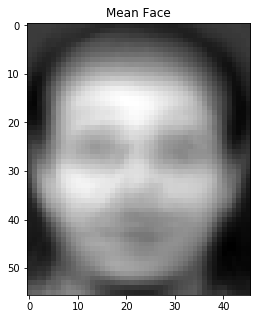

In [229]:
# Part 1a: Mean Face and the first 4 eigenfaces
plt.rcParams["figure.figsize"] = (10,5)
mean_face_vector = np.mean(train_X, axis=0)
plt.title("Mean Face")
plt.imshow(mean_face_vector.reshape(56,46), cmap='gray')
plt.show()

In [214]:
# Run PCA
pca = PCA()
result = pca.fit(train_X - mean_face_vector)

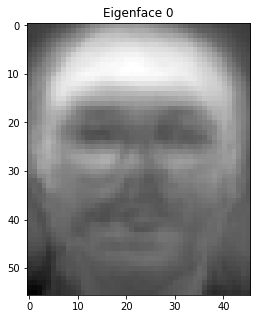

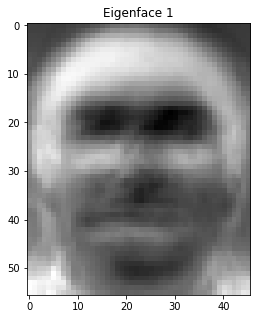

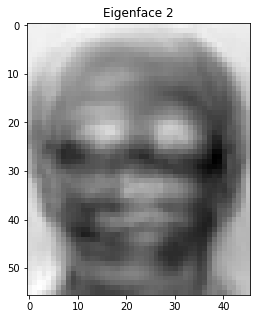

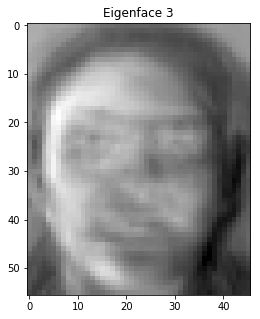

In [228]:
for i in range(0, 4):
    plt.rcParams["figure.figsize"] = (10,5)
    
    ei = (result.components_[i]).reshape(56,46)
    plt.imshow(ei,cmap='gray')
    plt.title("Eigenface {:d}".format(i))
    plt.show()

## Part 2

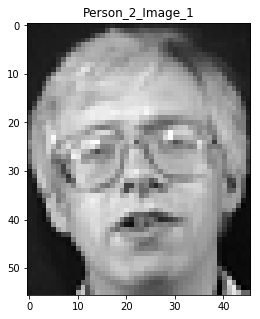

In [227]:
# Load person2_image1
source = grey_imread(2, 1).reshape(1, -1) # reshape(img_size, -1) won't work

plt.rcParams["figure.figsize"] = (10,5)
plt.title("Person_2_Image_1")
plt.imshow(source.reshape(56,46), cmap="gray")
plt.show()

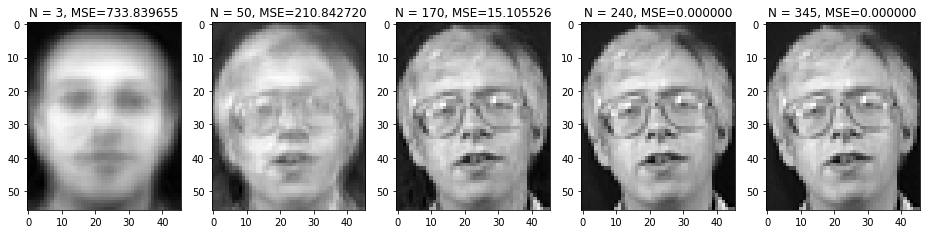

In [243]:
# Projection in Eigenspace
projected = pca.transform(source - mean_face_vector)
eigenspace = [3, 50, 170, 240, 345]

for i in range(len(eigenspace)):
    e = eigenspace[i]
    product = np.dot(projected[:,:e], result.components_[:e]) + mean_face_vector
    mean_square = np.mean((product - source)**2)
    
    plt.rcParams["figure.figsize"] = (16,5)
    plt.subplot(1, 5, i+1)
    plt.title("N = {:d}, MSE={:f}".format(e, mean_square))
    plt.imshow(product.reshape(56,46), cmap = "gray")

plt.show()


## Part 3

#### The MSE for the 5 images are recorded above the figures